In [ ]:
'''
Radial Basis Networks
    - Radial basis networks are an uncommon subtype of neural network that uses radial basis functions as the 
      activation function (instead of the logistic function or ReLU or other linear or nonlinear peers)
    - RBNs can be used for functional approximation.
'''

In [ ]:
'''
An RBF network is a type of feed forward neural network composed of three layers, namely the input layer, 
the hidden layer and the output layer

'''

In [ ]:
'''
RBNs :

    - Radial basis networks are fully-conneced feedforward neural networks that use a radial basis function as 
      their activation on their hidden layers.
'''

In [ ]:
'''
 A Gaussian function is used as the transfer function in computational units. 
 Depending on the case, it is typically observed that the RBF network required less time to reach the end of 
 training compared to MLP. 


'''

In [ ]:
'''
Radial Basis Function (RBF) Neural Networks

RBF network in its simplest form is a three-layer feedforward neural network. 
The first layer corresponds to the inputs of the network,
the second is a hidden layer consisting of a number of RBF non-linear activation units,
and the last one corresponds to the final output of the network. 
Activation functions in RBFNs are conventionally implemented as Gaussian functions. 


'''

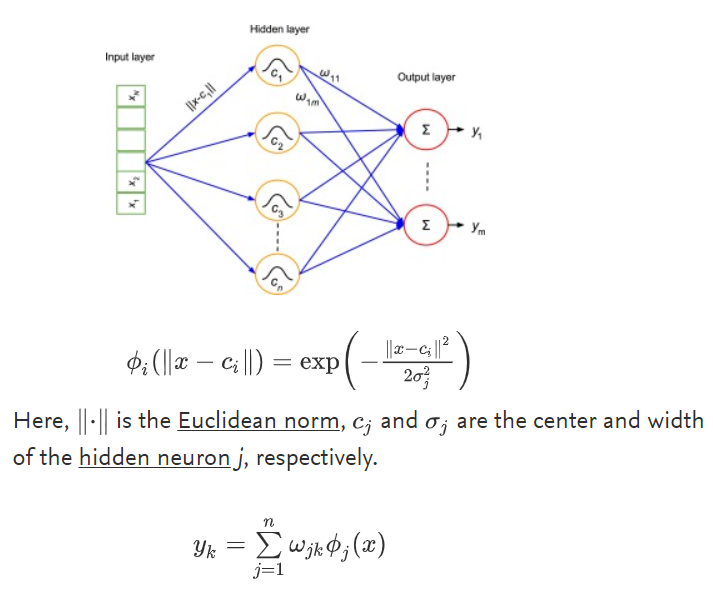

In [ ]:
'''

Most of classical approaches deployed in the literature for training RBFNs are performed in two stages. 
In the first stage the centers and widths are determined using for example some unsupervised clustering algorithm, 
while in the second stage the connection weights between the hidden layer and the output layer are found in a way 
such as an error criterion like the common Mean Squared Error (MSE) is minimized over all the data set.


'''

In [ ]:
'''
The output of the ith activation function in the hidden layer of the network can be calculated 
as shown in above the fig based on the distance between the input pattern x and the center i.

'''

In [ ]:
'''
Radial Basis Function :

- A radial basis function is any function which is defined as a function of distance from a certain central point (a radius).

RBFs can be used to approximate any other function by solving for the form  y(x)=∑Ni=1wiϕ(||x−xi||) 

The formula for a single RBF neuron activation is:

                    exp(−γ∑(x−μ)2)
                    
                    
x  is a single input tensor (a vector, as we are only defining RBF for a flat record)

μ  is a learned weight vector (e.g. one weight per xi in x); 

γ  is a user-specified tuning parameter

'''

In [4]:
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [ ]:
import pandas as pd
import numpy as np

X = np.load('../input/k49-train-imgs.npz')['arr_0']
y = np.load('../input/k49-train-labels.npz')['arr_0']
y = (y <= 25).astype(int)

from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(RBFLayer(10, 0.5))
model.add(Dense(1, activation='sigmoid', name='foo'))

model.compile(optimizer='rmsprop', loss=binary_crossentropy)